In [1]:
# make the necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
idx = pd.IndexSlice
import statsmodels.api as sm

from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from sklearn.model_selection import train_test_split

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Identification of Cointegrated Pairs of Stocks

In [2]:
# read back the pricing data
prices = pd.read_csv('IT.csv', index_col=['date'])
prices.head(10)

INFY.NS       TCS.NS  HCLTECH.NS    WIPRO.NS    TECHM.NS  \
date                                                                      
01-01-2018  516.775024  1322.800049  439.350006  237.412552  503.100006   
02-01-2018  514.849976  1315.599976  446.399994  239.025055  513.950012   
03-01-2018  510.649994  1319.324951  448.649994  232.462555  519.450012   
04-01-2018  507.700012  1328.550049  446.549988  233.737564  522.549988   
05-01-2018  506.000000  1344.599976  450.024994  232.162552  525.450012   
08-01-2018  518.025024  1357.199951  450.250000  233.362564  536.299988   
09-01-2018  520.674988  1354.500000  446.924988  237.900055  533.849976   
10-01-2018  526.125000  1403.300049  457.924988  245.025055  542.099976   
11-01-2018  537.900024  1395.250000  458.450012  240.825058  551.700012   
12-01-2018  539.224976  1388.175049  462.950012  239.100052  550.750000   

                 LTI.NS  MINDTREE.NS  MPHASIS.NS  COFORGE.NS      LTTS.NS  
date                                                                       
01-01-2018  1145.400024   606.900024  738.250000  653.799988  1073.449951  
02-01-2018  1149.000000   605.049988  734.650024  642.549988  1105.550049  
03-01-2018  1124.800049   599.299988  720.049988  645.950012  1137.750000  
04-01-2018  1130.550049   599.900024  715.849976  653.150024  1137.900024  
05-01-2018  1108.500000   602.299988  714.000000  669.500000  1128.250000  
08-01-2018  1118.050049   632.650024  715.599976  704.049988  1111.349976  
09-01-2018  1109.050049   626.049988  712.349976  689.900024  1082.650024  
10-01-2018  1112.900024   623.849976  710.000000  719.150024  1075.300049  
11-01-2018  1118.099976   621.200012  716.200012  717.650024  1054.900024  
12-01-2018  1124.650024   633.750000  728.599976  701.299988  1043.800049

In [3]:
# train test split 
train_close, test_close = train_test_split(prices, test_size=0.251012, shuffle=False)

In [4]:
# quick view of head and tail of train set
train_close.head(2).append(train_close.tail(2))

INFY.NS       TCS.NS  HCLTECH.NS    WIPRO.NS    TECHM.NS  \
date                                                                       
01-01-2018   516.775024  1322.800049  439.350006  237.412552  503.100006   
02-01-2018   514.849976  1315.599976  446.399994  239.025055  513.950012   
30-12-2020  1246.800049  2909.300049  940.700012  384.399994  983.250000   
31-12-2020  1255.800049  2862.750000  946.150024  386.250000  973.200012   

                 LTI.NS  MINDTREE.NS   MPHASIS.NS   COFORGE.NS      LTTS.NS  
date                                                                         
01-01-2018  1145.400024   606.900024   738.250000   653.799988  1073.449951  
02-01-2018  1149.000000   605.049988   734.650024   642.549988  1105.550049  
30-12-2020  3661.149902  1629.949951  1590.400024  2694.600098  2338.649902  
31-12-2020  3659.500000  1660.349976  1539.949951  2705.149902  2339.600098

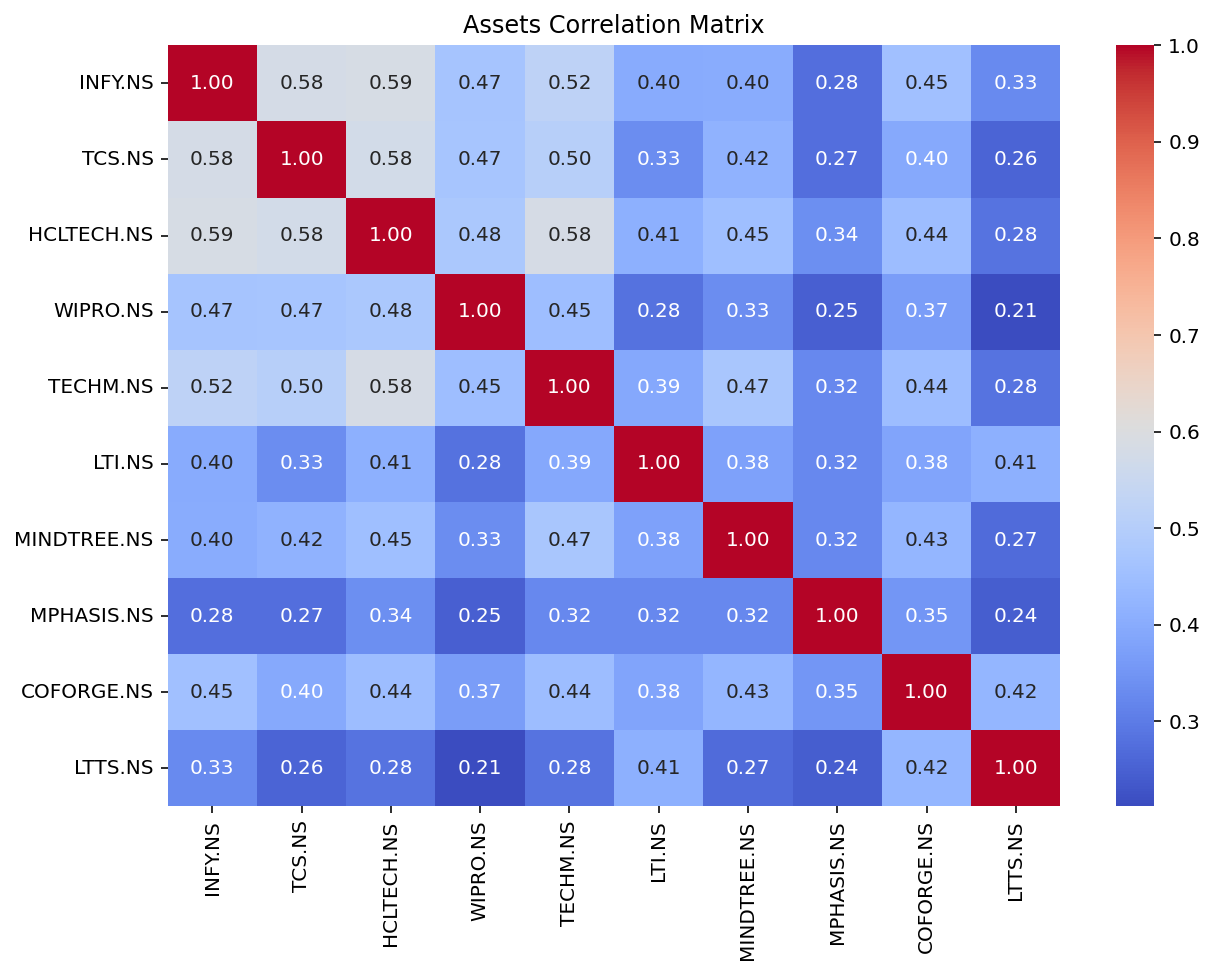

In [5]:
# Pearson correlation to get the basic idea about the relationship
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(train_close.pct_change().corr(method ='pearson'), ax=ax, cmap='coolwarm', annot=True, fmt=".2f") #spearman
ax.set_title('Assets Correlation Matrix')
plt.savefig('chart1', dpi=400)

In [6]:
# function to find cointegrated pairs
def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.05:
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs

[('INFY.NS', 'HCLTECH.NS'), ('TCS.NS', 'WIPRO.NS'), ('TCS.NS', 'COFORGE.NS'), ('HCLTECH.NS', 'LTI.NS'), ('WIPRO.NS', 'LTTS.NS'), ('TECHM.NS', 'LTTS.NS')]


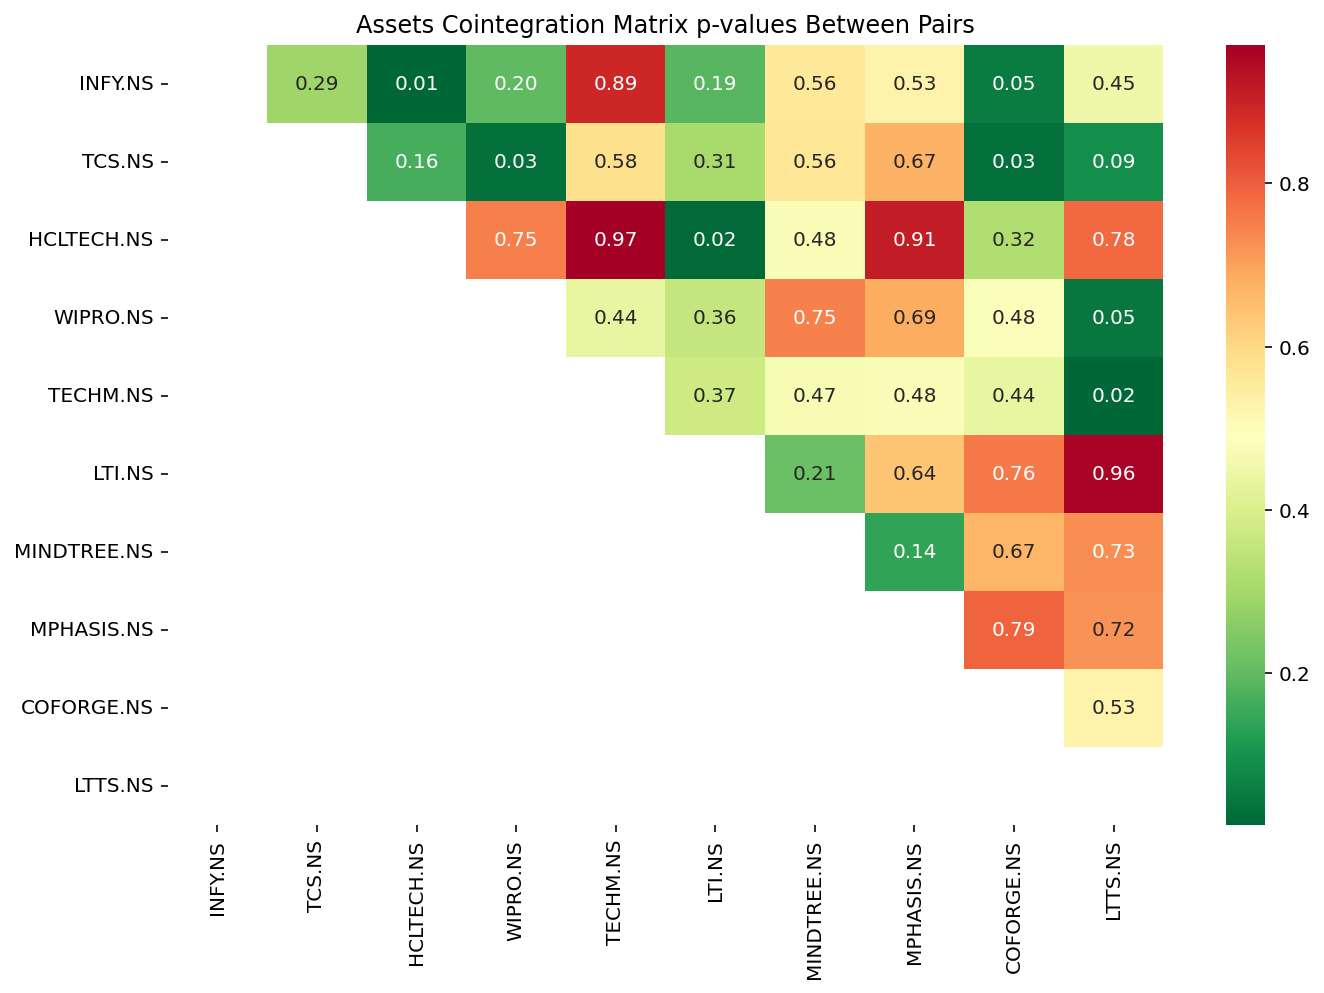

In [7]:
# calculate p-values and plot as a heatmap
pvalues, pairs = find_cointegrated_pairs(train_close)
print(pairs)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(pvalues, xticklabels = train_close.columns,
                yticklabels = train_close.columns, cmap = 'RdYlGn_r', annot = True, fmt=".2f",
                mask = (pvalues >= 0.99))
ax.set_title('Assets Cointegration Matrix p-values Between Pairs')
plt.tight_layout()
plt.savefig('chart2', dpi=400) 

### Perform a Cointegration test for the Selected Pair

In [8]:
# final pair to test strategy
asset1 = 'TCS.NS'
asset2 = 'COFORGE.NS'

In [9]:
# create a train dataframe of 2 assets
train = pd.DataFrame()
train['asset1'] = train_close[asset1]
train['asset2'] = train_close[asset2]

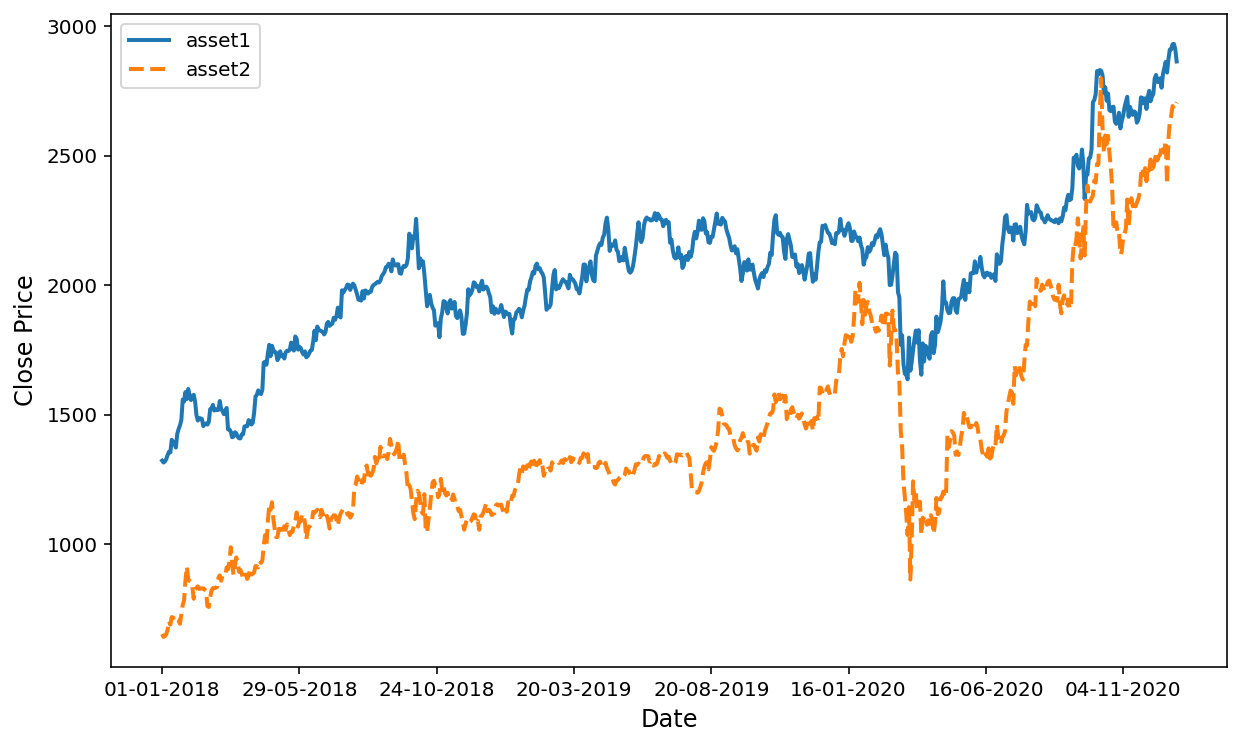

In [11]:
from matplotlib.dates import DateFormatter
# visualize closing prices
ax = train[['asset1']].plot(figsize=(10, 6), linewidth=2,linestyle='solid', label = "asset1")
plt.plot(train[['asset2']], linewidth=2, linestyle='dashed', label = "asset2")
ax.set_ylabel("Close Price", fontsize=12)
ax.set_xlabel("Date", fontsize=12)
plt.legend()
#date_form = DateFormatter("%Y")
# ax.xaxis.set_major_formatter(date_form)
#ax.grid(True);
plt.savefig('chart3', dpi=500) 

In [12]:
# run OLS regression
model=sm.OLS(train.asset2, train.asset1).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 asset2   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                          2.473e+04
Date:                Thu, 12 May 2022   Prob (F-statistic):                        0.00
Time:                        15:26:44   Log-Likelihood:                         -5145.6
No. Observations:                 740   AIC:                                  1.029e+04
Df Residuals:                     739   BIC:                                  1.030e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
asset1         0.7061      0.004    157.243      0.000       0.697       0.715
==============================================================================
Omnibus:                      104.891   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.569
Skew:                           1.101   Prob(JB):                     2.01e-33
Kurtosis:                       3.178   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

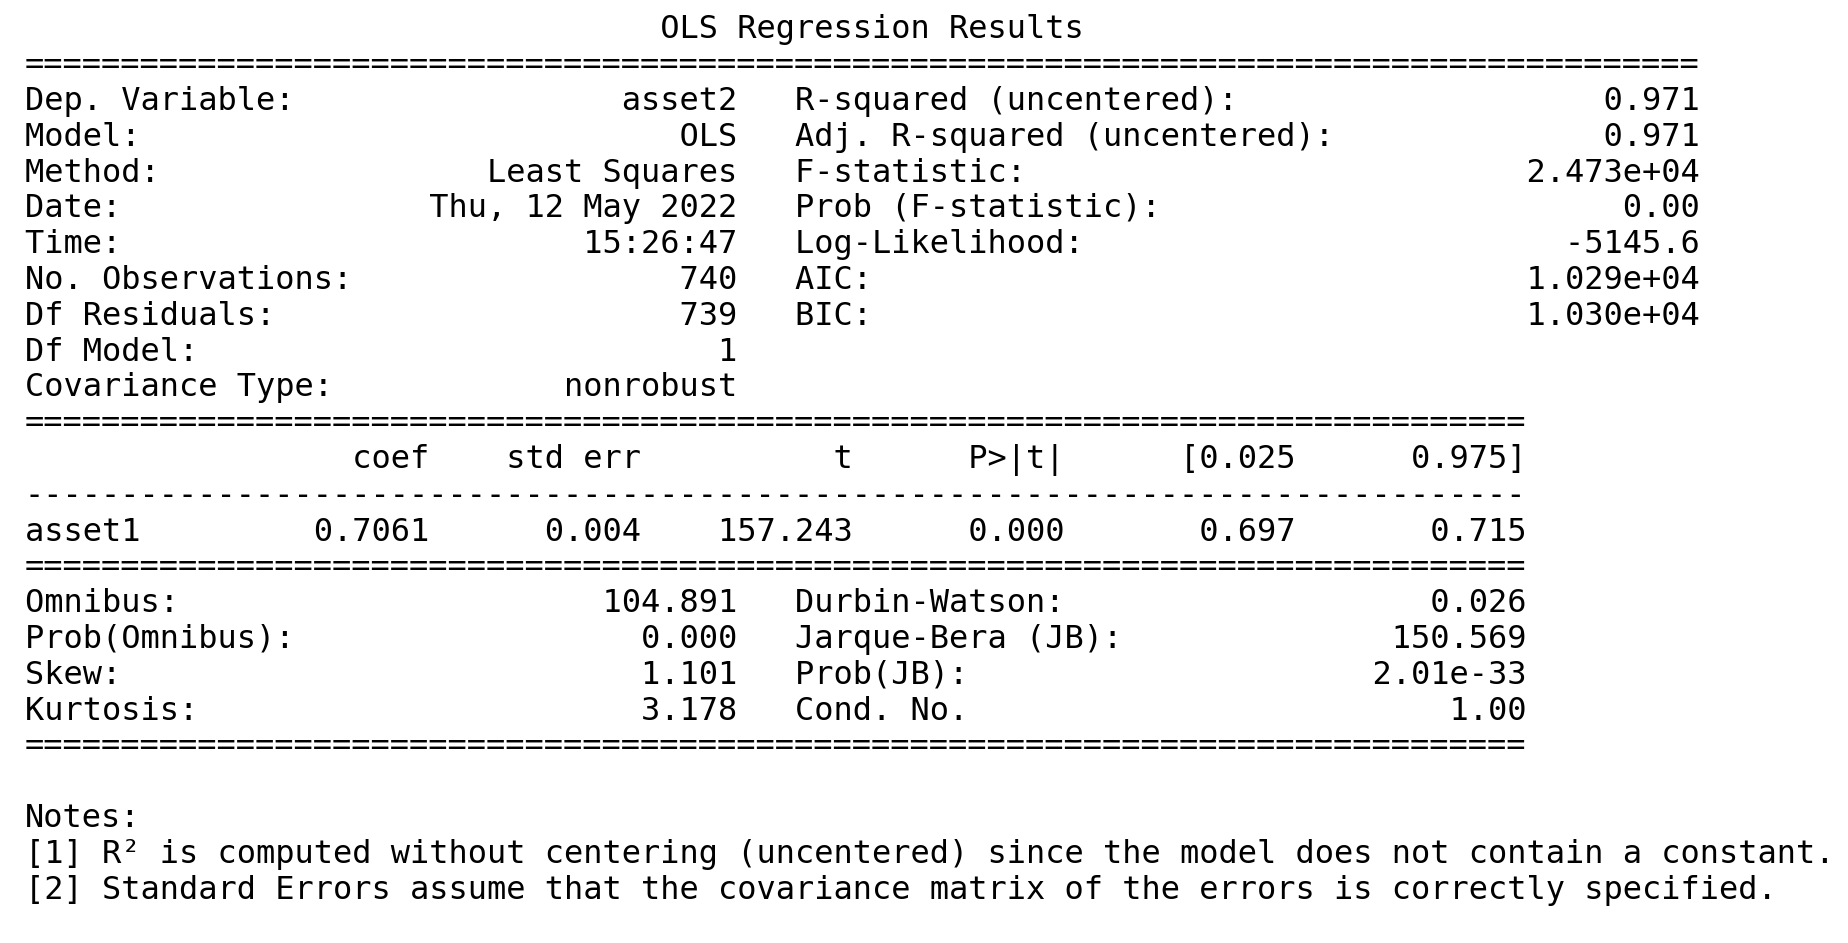

In [14]:
# print regression summary results
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 16}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.8, top=0.7, bottom=0.1)
plt.savefig('chart4', dpi=400);

In [15]:
print('Hedge Ratio = ', model.params[0])

Hedge Ratio =  0.70613783702607


In [17]:
# calculate spread
residual = train.asset2 - model.params[0] * train.asset1

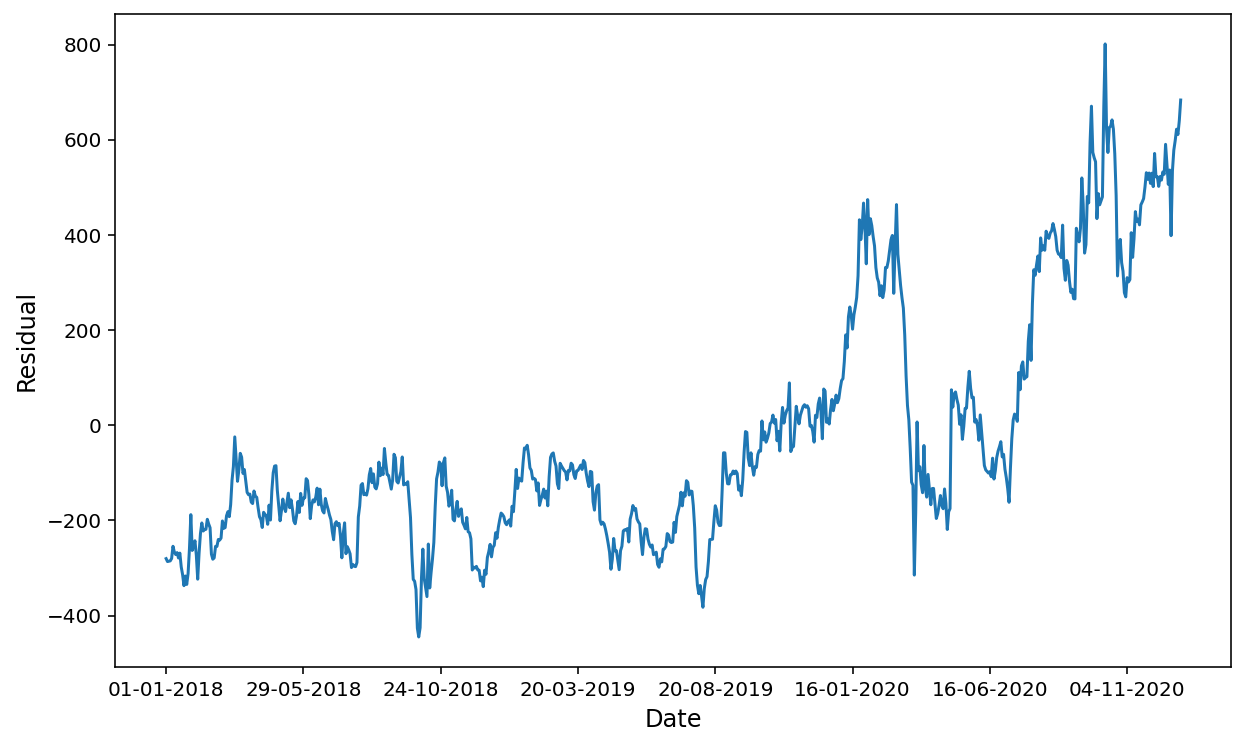

In [18]:
# Plot the residual
ax = residual.plot(figsize=(10, 6))
ax.set_ylabel("Residual", fontsize=12)
ax.set_xlabel("Date", fontsize=12)
# ax.grid(True);
plt.savefig('chart5', dpi=500);

In [19]:
# conduct Augmented Dickey-Fuller test
adf = adfuller(spread, maxlag = 1)
adf

(-1.2592260788752292,
 0.6476139928086799,
 1,
 738,
 {'1%': -3.4392418578608983,
  '5%': -2.86546426916434,
  '10%': -2.568859710342903},
 7569.65376447958)

In [20]:
print('Critical Value = ', adf[0])

Critical Value =  -1.2592260788752292


In [21]:
# probablity critical values
print(adf[4])

{'1%': -3.4392418578608983, '5%': -2.86546426916434, '10%': -2.568859710342903}


### Generate Trading Signals using z-score

In [22]:
# calculate z-score
def zscore(series):
    return (series - series.mean()) / np.std(series)

In [23]:
# create a dataframe for trading signals
signals = pd.DataFrame()
signals['asset1'] = test_close[asset1] 
signals['asset2'] = test_close[asset2]
ratios = signals.asset1 / signals.asset2

In [24]:
signals.head()

asset1       asset2
date                                
01-01-2021  2928.250000  2722.250000
04-01-2021  3039.449951  2838.550049
05-01-2021  3093.000000  2882.550049
06-01-2021  3051.500000  2801.550049
07-01-2021  3032.800049  2740.800049

In [25]:
# calculate z-score and define upper and lower thresholds
signals['z'] = zscore(ratios)
signals['z upper limit'] = np.mean(signals['z']) + np.std(signals['z'])
signals['z lower limit'] = np.mean(signals['z']) - np.std(signals['z'])

In [26]:
signals.head()

asset1       asset2         z  z upper limit  z lower limit
date                                                                        
01-01-2021  2928.250000  2722.250000  0.949526            1.0           -1.0
04-01-2021  3039.449951  2838.550049  0.926688            1.0           -1.0
05-01-2021  3093.000000  2882.550049  0.937100            1.0           -1.0
06-01-2021  3051.500000  2801.550049  1.012700            1.0           -1.0
07-01-2021  3032.800049  2740.800049  1.093474            1.0           -1.0

In [27]:
# create signal - short if z-score is greater than upper limit else long
signals['signals1'] = 0
signals['signals1'] = np.select([signals['z'] > \
                                 signals['z upper limit'], signals['z'] < signals['z lower limit']], [-1, 1], default=0)

In [28]:
# we take the first order difference to obtain portfolio position in that stock
signals['positions1'] = signals['signals1'].diff()
signals['signals2'] = -signals['signals1']
signals['positions2'] = signals['signals2'].diff()

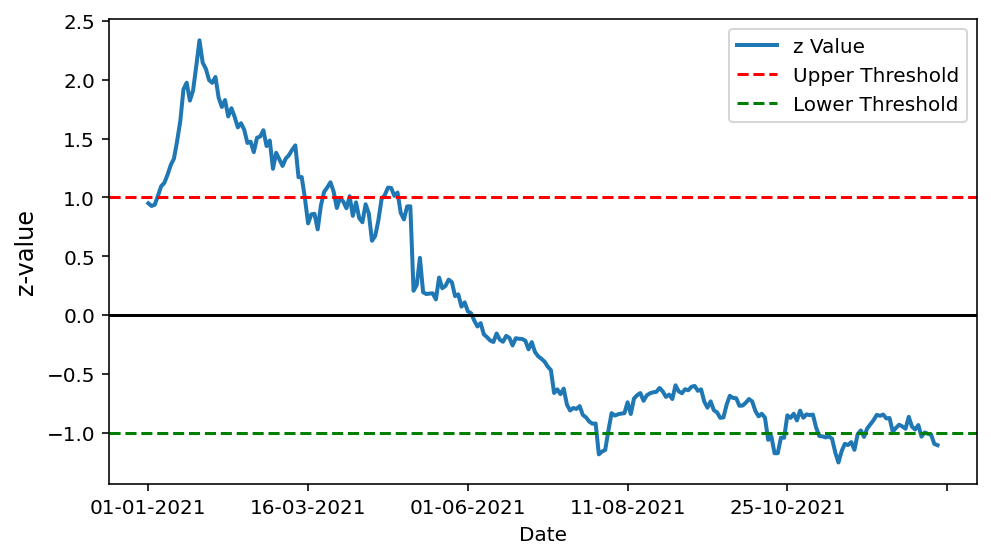

In [30]:
# # visualize z-score and upper and lower thresholds   
signals['z'].plot(label="z Value", figsize=(7, 4), linewidth=2)
#plt.title("Z-score Evaluation")
plt.ylabel("z-value", fontsize=12)
plt.xlabel("Date")
plt.axhline(signals['z'].mean(),linestyle= 'solid', color="black")
plt.axhline(signals['z upper limit'].mean(), linestyle= 'dashed',color="red", label="Upper Threshold")
plt.axhline(signals['z lower limit'].mean(), linestyle = 'dashed', color="green", label="Lower Threshold")
plt.legend()
plt.tight_layout()
plt.savefig('chart6', dpi=500);

In [31]:
# verify dataframe head and tail
signals.head(3).append(signals.tail(3))

asset1       asset2         z  z upper limit  z lower limit  \
date                                                                           
01-01-2021  2928.250000  2722.250000  0.949526            1.0           -1.0   
04-01-2021  3039.449951  2838.550049  0.926688            1.0           -1.0   
05-01-2021  3093.000000  2882.550049  0.937100            1.0           -1.0   
29-12-2021  3694.699951  5649.100098 -1.016866            1.0           -1.0   
30-12-2021  3733.750000  5860.649902 -1.095893            1.0           -1.0   
31-12-2021  3738.350098  5890.350098 -1.107232            1.0           -1.0   

            signals1  positions1  signals2  positions2  
date                                                    
01-01-2021         0         NaN         0         NaN  
04-01-2021         0         0.0         0         0.0  
05-01-2021         0         0.0         0         0.0  
29-12-2021         1         0.0        -1         0.0  
30-12-2021         1         0.0        -1         0.0  
31-12-2021         1         0.0        -1         0.0

In [32]:
# # check portfolio position
signals[signals.signals1 != 0].head(10)

asset1       asset2         z  z upper limit  z lower limit  \
date                                                                           
06-01-2021  3051.500000  2801.550049  1.012700            1.0           -1.0   
07-01-2021  3032.800049  2740.800049  1.093474            1.0           -1.0   
08-01-2021  3120.899902  2804.199951  1.123319            1.0           -1.0   
11-01-2021  3176.449951  2817.050049  1.191607            1.0           -1.0   
12-01-2021  3174.850098  2772.350098  1.273704            1.0           -1.0   
13-01-2021  3158.949951  2730.199951  1.328997            1.0           -1.0   
14-01-2021  3250.699951  2734.000000  1.478005            1.0           -1.0   
15-01-2021  3233.350098  2637.800049  1.649557            1.0           -1.0   
18-01-2021  3221.750000  2509.850098  1.919431            1.0           -1.0   
19-01-2021  3260.699951  2517.000000  1.974595            1.0           -1.0   

            signals1  positions1  signals2  positions2  
date                                                    
06-01-2021        -1        -1.0         1         1.0  
07-01-2021        -1         0.0         1         0.0  
08-01-2021        -1         0.0         1         0.0  
11-01-2021        -1         0.0         1         0.0  
12-01-2021        -1         0.0         1         0.0  
13-01-2021        -1         0.0         1         0.0  
14-01-2021        -1         0.0         1         0.0  
15-01-2021        -1         0.0         1         0.0  
18-01-2021        -1         0.0         1         0.0  
19-01-2021        -1         0.0         1         0.0

In [34]:
signals[signals.positions1 != 0].head().append(signals[signals.positions1 != 0].tail())

asset1       asset2         z  z upper limit  z lower limit  \
date                                                                           
01-01-2021  2928.250000  2722.250000  0.949526            1.0           -1.0   
06-01-2021  3051.500000  2801.550049  1.012700            1.0           -1.0   
15-03-2021  3066.149902  2825.399902  0.994002            1.0           -1.0   
23-03-2021  3142.600098  2866.550049  1.045728            1.0           -1.0   
30-03-2021  3158.550049  2960.100098  0.909274            1.0           -1.0   
30-11-2021  3529.149902  5431.600098 -1.036870            1.0           -1.0   
01-12-2021  3577.800049  5378.600098 -0.964827            1.0           -1.0   
24-12-2021  3670.899902  5645.600098 -1.034635            1.0           -1.0   
27-12-2021  3696.100098  5618.149902 -0.998900            1.0           -1.0   
28-12-2021  3706.550049  5655.700195 -1.010654            1.0           -1.0   

            signals1  positions1  signals2  positions2  
date                                                    
01-01-2021         0         NaN         0         NaN  
06-01-2021        -1        -1.0         1         1.0  
15-03-2021         0         1.0         0        -1.0  
23-03-2021        -1        -1.0         1         1.0  
30-03-2021         0         1.0         0        -1.0  
30-11-2021         1         1.0        -1        -1.0  
01-12-2021         0        -1.0         0         1.0  
24-12-2021         1         1.0        -1        -1.0  
27-12-2021         0        -1.0         0         1.0  
28-12-2021         1         1.0        -1        -1.0

In [35]:
signals.loc[signals['positions1'] == 1].index
signals['asset1'][signals['positions1'] == 1].value_counts()

3066.149902    1
3158.550049    1
3271.399902    1
3035.649902    1
3195.800049    1
3611.449951    1
3505.699951    1
3529.149902    1
3670.899902    1
3706.550049    1
Name: asset1, dtype: int64

In [36]:
signals

asset1       asset2         z  z upper limit  z lower limit  \
date                                                                           
01-01-2021  2928.250000  2722.250000  0.949526            1.0           -1.0   
04-01-2021  3039.449951  2838.550049  0.926688            1.0           -1.0   
05-01-2021  3093.000000  2882.550049  0.937100            1.0           -1.0   
06-01-2021  3051.500000  2801.550049  1.012700            1.0           -1.0   
07-01-2021  3032.800049  2740.800049  1.093474            1.0           -1.0   
...                 ...          ...       ...            ...            ...   
27-12-2021  3696.100098  5618.149902 -0.998900            1.0           -1.0   
28-12-2021  3706.550049  5655.700195 -1.010654            1.0           -1.0   
29-12-2021  3694.699951  5649.100098 -1.016866            1.0           -1.0   
30-12-2021  3733.750000  5860.649902 -1.095893            1.0           -1.0   
31-12-2021  3738.350098  5890.350098 -1.107232            1.0           -1.0   

            signals1  positions1  signals2  positions2  
date                                                    
01-01-2021         0         NaN         0         NaN  
04-01-2021         0         0.0         0         0.0  
05-01-2021         0         0.0         0         0.0  
06-01-2021        -1        -1.0         1         1.0  
07-01-2021        -1         0.0         1         0.0  
...              ...         ...       ...         ...  
27-12-2021         0        -1.0         0         1.0  
28-12-2021         1         1.0        -1        -1.0  
29-12-2021         1         0.0        -1         0.0  
30-12-2021         1         0.0        -1         0.0  
31-12-2021         1         0.0        -1         0.0  

[248 rows x 9 columns]

In [37]:
signals = signals.reset_index()

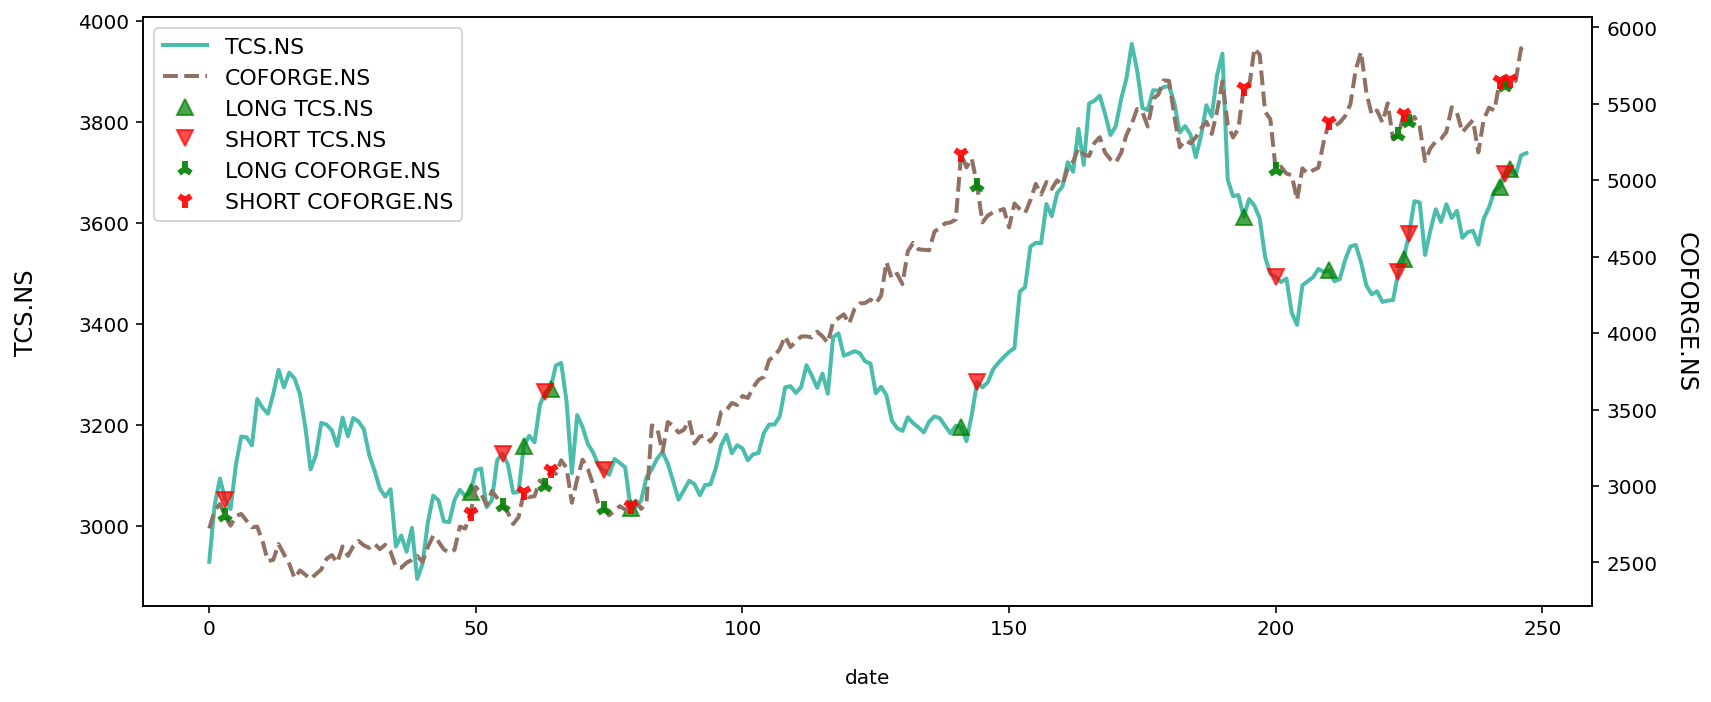

In [39]:
# visualize trading signals and position
fig=plt.figure(figsize=(12,5))
bx = fig.add_subplot(111)   
bx2 = bx.twinx()

#plot two different assets
l1, = bx.plot(signals['asset1'], c='#4abdac', linestyle = 'solid', linewidth=2)
l2, = bx2.plot(signals['asset2'], c='#907163', linestyle = 'dashed', linewidth=2)

u1, = bx.plot(signals['asset1'][signals['positions1'] == 1], lw=0, 
              marker='^', markersize=8, c='g',alpha=0.7)

d1, = bx.plot(signals['asset1'][signals['positions1'] == -1], lw=0,
              marker='v',markersize=8, c='r',alpha=0.7)

u2, = bx2.plot(signals['asset2'][signals['positions2'] == 1], lw=0,
               marker='2',markersize=8, c='g',alpha=0.9, markeredgewidth=3)

d2, = bx2.plot(signals['asset2'][signals['positions2'] == -1], lw=0,
               marker='1',markersize=8, c='r',alpha=0.9,markeredgewidth=3)
bx.set_ylabel(asset1,fontsize=12)
bx2.set_ylabel(asset2, rotation=270, fontsize=12)
bx.yaxis.labelpad=20
bx2.yaxis.labelpad=20
bx.set_xlabel('date')
# bx.xaxis.set_major_formatter(DateFormatter("%Y"))
# bx2.xaxis.set_major_formatter(DateFormatter("%Y"))
bx.xaxis.labelpad=15

plt.legend([l1,l2,u1,d1,u2,d2], [asset1, asset2,'LONG {}'.format(asset1),
           'SHORT {}'.format(asset1),
           'LONG {}'.format(asset2),
           'SHORT {}'.format(asset2)], loc ='best', fontsize = 11)

#plt.title('Pair Trading - Trading Signals and Position')
plt.xlabel('Date', fontsize=12)
#plt.grid(True)
plt.tight_layout()
plt.savefig('chart7', dpi=500);

### Portfolio Profit and Loss Calculation

In [40]:
# initial capital to calculate the actual pnl
initial_capital = 100000

# shares to buy for each position
positions1 = initial_capital// max(signals['asset1'])
positions2 = initial_capital// max(signals['asset2'])

In [41]:
# since there are two assets, we calculate each asset Pnl separately 
# and in the end we aggregate them into one portfolio
portfolio = pd.DataFrame()
portfolio['asset1'] = signals['asset1']
portfolio['holdings1'] = signals['positions1'].cumsum() * signals['asset1'] * positions1
portfolio['cash1'] = initial_capital - (signals['positions1'] * signals['asset1'] * positions1).cumsum()
portfolio['total asset1'] = portfolio['holdings1'] + portfolio['cash1']
portfolio['return1'] = portfolio['total asset1'].pct_change()
portfolio['positions1'] = signals['positions1']

In [42]:
portfolio.head().append(portfolio.tail())

asset1     holdings1          cash1   total asset1   return1  \
0    2928.250000           NaN            NaN            NaN       NaN   
1    3039.449951      0.000000  100000.000000  100000.000000       NaN   
2    3093.000000      0.000000  100000.000000  100000.000000  0.000000   
3    3051.500000 -76287.500000  176287.500000  100000.000000  0.000000   
4    3032.800049 -75820.001225  176287.500000  100467.498775  0.004675   
243  3696.100098      0.000000  101932.513475  101932.513475  0.006219   
244  3706.550049  92663.751225    9268.762250  101932.513475  0.000000   
245  3694.699951  92367.498775    9268.762250  101636.261025 -0.002906   
246  3733.750000  93343.750000    9268.762250  102612.512250  0.009605   
247  3738.350098  93458.752450    9268.762250  102727.514700  0.001121   

     positions1  
0           NaN  
1           0.0  
2           0.0  
3          -1.0  
4           0.0  
243        -1.0  
244         1.0  
245         0.0  
246         0.0  
247         0.0

In [43]:
portfolio[portfolio.positions1 != 0].head()

asset1    holdings1          cash1   total asset1   return1  \
0   2928.250000          NaN            NaN            NaN       NaN   
3   3051.500000 -76287.50000  176287.500000  100000.000000  0.000000   
49  3066.149902      0.00000   99633.752450   99633.752450 -0.002053   
55  3142.600098 -78565.00245  178198.754900   99633.752450  0.000000   
59  3158.550049      0.00000   99235.003675   99235.003675 -0.022592   

    positions1  
0          NaN  
3         -1.0  
49         1.0  
55        -1.0  
59         1.0

In [44]:
# pnl for the 2nd asset
portfolio['asset2'] = signals['asset2']
portfolio['holdings2'] = signals['positions2'].cumsum() * signals['asset2'] * positions2
portfolio['cash2'] = initial_capital - (signals['positions2'] * signals['asset2'] * positions2).cumsum()
portfolio['total asset2'] = portfolio['holdings2'] + portfolio['cash2']
portfolio['return2'] = portfolio['total asset2'].pct_change()
portfolio['positions2'] = signals['positions2']

In [45]:
portfolio.to_csv('portfolio.csv')
portfolio.head().append(portfolio.tail())

asset1     holdings1          cash1   total asset1   return1  \
0    2928.250000           NaN            NaN            NaN       NaN   
1    3039.449951      0.000000  100000.000000  100000.000000       NaN   
2    3093.000000      0.000000  100000.000000  100000.000000  0.000000   
3    3051.500000 -76287.500000  176287.500000  100000.000000  0.000000   
4    3032.800049 -75820.001225  176287.500000  100467.498775  0.004675   
243  3696.100098      0.000000  101932.513475  101932.513475  0.006219   
244  3706.550049  92663.751225    9268.762250  101932.513475  0.000000   
245  3694.699951  92367.498775    9268.762250  101636.261025 -0.002906   
246  3733.750000  93343.750000    9268.762250  102612.512250  0.009605   
247  3738.350098  93458.752450    9268.762250  102727.514700  0.001121   

     positions1       asset2     holdings2          cash2   total asset2  \
0           NaN  2722.250000           NaN            NaN            NaN   
1           0.0  2838.550049      0.000000  100000.000000  100000.000000   
2           0.0  2882.550049      0.000000  100000.000000  100000.000000   
3          -1.0  2801.550049  44824.800784   55175.199216  100000.000000   
4           0.0  2740.800049  43852.800784   55175.199216   99028.000000   
243        -1.0  5618.149902      0.000000  118488.804688  118488.804688   
244         1.0  5655.700195 -90491.203120  208980.007808  118488.804688   
245         0.0  5649.100098 -90385.601568  208980.007808  118594.406240   
246         0.0  5860.649902 -93770.398432  208980.007808  115209.609376   
247         0.0  5890.350098 -94245.601568  208980.007808  114734.406240   

          return2  positions2  
0             NaN         NaN  
1             NaN         0.0  
2    0.000000e+00         0.0  
3    0.000000e+00         1.0  
4   -9.720000e-03         0.0  
243  3.720497e-03         1.0  
244  2.220446e-16        -1.0  
245  8.912365e-04         0.0  
246 -2.854095e-02         0.0  
247 -4.124683e-03         0.0

In [46]:
portfolio[portfolio.positions2 != 0].head()

asset1    holdings1          cash1   total asset1   return1  \
0   2928.250000          NaN            NaN            NaN       NaN   
3   3051.500000 -76287.50000  176287.500000  100000.000000  0.000000   
49  3066.149902      0.00000   99633.752450   99633.752450 -0.002053   
55  3142.600098 -78565.00245  178198.754900   99633.752450  0.000000   
59  3158.550049      0.00000   99235.003675   99235.003675 -0.022592   

    positions1       asset2     holdings2          cash2   total asset2  \
0          NaN  2722.250000           NaN            NaN            NaN   
3         -1.0  2801.550049  44824.800784   55175.199216  100000.000000   
49         1.0  2825.399902      0.000000  100381.597648  100381.597648   
55        -1.0  2866.550049  45864.800784   54516.796864  100381.597648   
59         1.0  2960.100098      0.000000  101878.398432  101878.398432   

     return2  positions2  
0        NaN         NaN  
3   0.000000         1.0  
49  0.016741        -1.0  
55  0.000000         1.0  
59  0.026445        -1.0

In [47]:
# total pnl and z-score
portfolio['z'] = signals['z']
portfolio['total asset'] = portfolio['total asset1'] + portfolio['total asset2']
portfolio['z upper limit'] = signals['z upper limit']
portfolio['z lower limit'] = signals['z lower limit']
portfolio = portfolio.dropna()

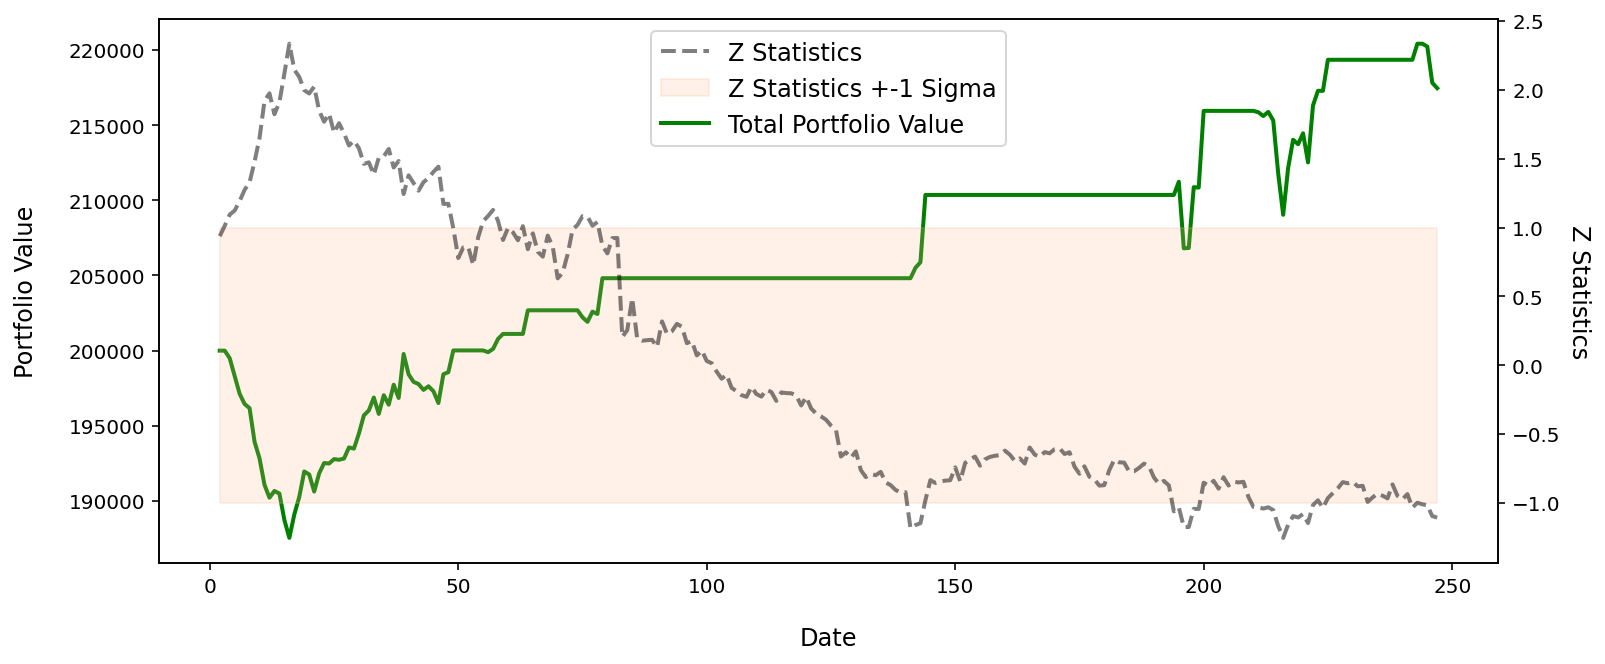

In [52]:
# plot the asset value change of the portfolio and pnl along with z-score
fig = plt.figure(figsize=(12,5),)
ax = fig.add_subplot(111)
ax2 = ax.twinx()

l1, = ax.plot(portfolio['total asset'], c='g', linewidth = 2, linestyle='solid')
l2, = ax2.plot(portfolio['z'], c='black', alpha=0.5, linewidth = 2, 
               linestyle='dashed')

b = ax2.fill_between(portfolio.index,portfolio['z upper limit'],\
                portfolio['z lower limit'], \
                alpha=0.2,color='#ffb48f')

ax.set_ylabel('Portfolio Value', fontsize=12)
ax2.set_ylabel('Z Statistics',rotation=270, fontsize=12)
ax.yaxis.labelpad=15
ax2.yaxis.labelpad=15
ax.set_xlabel('Date', fontsize=12)
ax.xaxis.labelpad=15
#plt.title('Portfolio Performance with Profit and Loss')
plt.legend([l2,b,l1],['Z Statistics',
                      'Z Statistics +-1 Sigma',
                      'Total Portfolio Value'],loc='upper center', fontsize=12);
plt.savefig('chart8', dpi=500);

In [44]:
#portfolio = pd.read_csv('portfolio.csv')

In [45]:
# calculate CAGR
final_portfolio = portfolio['total asset'].iloc[-1]
final_portfolio

217461.92094000004

In [46]:
profit = final_portfolio - 2*initial_capital
profit

17461.92094000004

In [47]:
roi = (profit /(2*initial_capital))*100
roi

8.730960470000019

In [ ]:
# delta = (portfolio.index[-1] - portfolio.index[0]).days
delta = (portfolio.index[-1] - portfolio.index[0])
print('Number of days = ', delta)

In [46]:
YEAR_DAYS = 365
returns = (final_portfolio/initial_capital) ** (YEAR_DAYS/delta) - 1
print('CAGR = {:.3f}%' .format(returns * 100))

CAGR = 218.150%
